In [2]:
import pandas as pd  # Bibliothèque pour manipuler des tableaux de données

# Charger le fichier CSV dans un DataFrame
df = pd.read_csv('/content/drive/MyDrive/projet Data science Palestine theme/demolitions_pse_isr_conflict_2004-01_to_2023-08.csv')

# Afficher les 5 premières lignes pour vérifier
print(df.head())

  date_of_demolition    locality district       area  housing_units  \
0         2023-08-30    Tarqumya   Hebron  west-bank              2   
1         2023-08-29  al-Bweirah   Hebron  west-bank              1   
2         2023-08-24      Shufah  Tulkarm  west-bank              1   
3         2023-08-21        Bidu  al-Quds  west-bank              8   
4         2023-08-21        Bidu  al-Quds  west-bank              3   

   people_left_homeless  minors_left_homeless type_of_sturcture  \
0                     0                     0   Non Resedential   
1                     0                     0        Residental   
2                     0                     0   Non Resedential   
3                     0                     0   Non Resedential   
4                     0                     0   Non Resedential   

                               reason_for_demolition  
0  Demolition on the pretext of unlawful construc...  
1  Demolition on the pretext of unlawful construc...  
2  De

In [6]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder  # Outils pour normaliser et encoder

# Afficher un aperçu des premières lignes
print("👉Aperçu initial des données :")
print(df.head())
print("\n👉Types de données :")
print(df.dtypes)
print("\n👉Valeurs manquantes :")
print(df.isnull().sum())



👉Aperçu initial des données :
  date_of_demolition    locality district       area  housing_units  \
0         2023-08-30    Tarqumya   Hebron  west-bank       0.083333   
1         2023-08-29  al-Bweirah   Hebron  west-bank       0.041667   
2         2023-08-24      Shufah  Tulkarm  west-bank       0.041667   
3         2023-08-21        Bidu  al-Quds  west-bank       0.333333   
4         2023-08-21        Bidu  al-Quds  west-bank       0.125000   

   people_left_homeless  minors_left_homeless type_of_sturcture  \
0                   0.0                   0.0   Non Resedential   
1                   0.0                   0.0        Residental   
2                   0.0                   0.0   Non Resedential   
3                   0.0                   0.0   Non Resedential   
4                   0.0                   0.0   Non Resedential   

                               reason_for_demolition  
0  Demolition on the pretext of unlawful construc...  
1  Demolition on the pretext o

In [5]:
# Remplir les valeurs manquantes avec la médiane pour les colonnes numériques
numerical_cols = ['housing_units', 'people_left_homeless', 'minors_left_homeless']
for col in numerical_cols:
    df[col].fillna(df[col].median(), inplace=True)

# Normaliser les colonnes numériques avec MinMaxScaler (met entre 0 et 1)
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Encoder les variables catégorielles avec One-Hot Encoding
categorical_cols = ['locality', 'district', 'area', 'type_of_sturcture', 'reason_for_demolition']
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Combiner les données encodées avec les numériques et la date
df_preprocessed = pd.concat([df['date_of_demolition'], df[numerical_cols], encoded_df], axis=1)

# Afficher un aperçu après prétraitement
print("\nAperçu après prétraitement :")
print(df_preprocessed.head())


Aperçu après prétraitement :
  date_of_demolition  housing_units  people_left_homeless  \
0         2023-08-30       0.083333                   0.0   
1         2023-08-29       0.041667                   0.0   
2         2023-08-24       0.041667                   0.0   
3         2023-08-21       0.333333                   0.0   
4         2023-08-21       0.125000                   0.0   

   minors_left_homeless  locality_'Abasan al-Jadidah (a-Saghirah)  \
0                   0.0                                       0.0   
1                   0.0                                       0.0   
2                   0.0                                       0.0   
3                   0.0                                       0.0   
4                   0.0                                       0.0   

   locality_'Abasan al-Kabirah  locality_'Anata  \
0                          0.0              0.0   
1                          0.0              0.0   
2                          0.0     

/tmp/ipython-input-3160691530.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


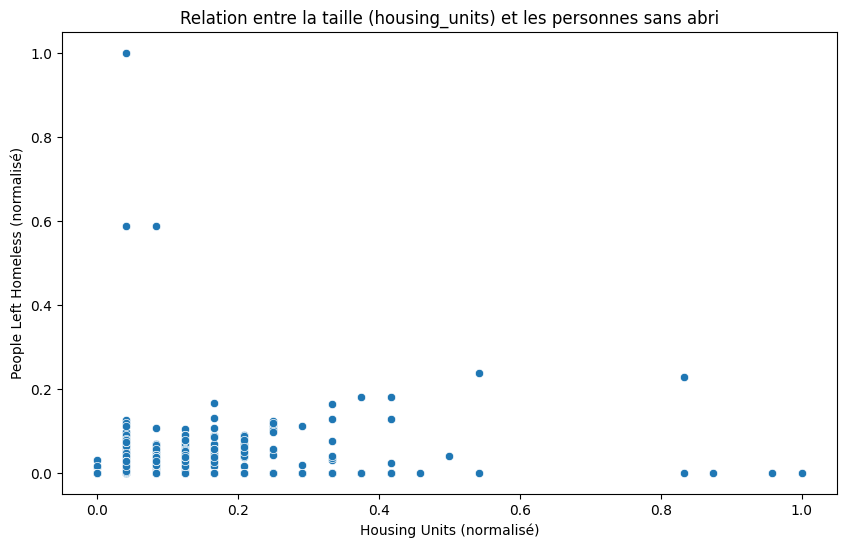

In [8]:
import matplotlib.pyplot as plt  # Pour dessiner des graphiques
import seaborn as sns  # Pour des graphiques plus jolis

# Convertir la date en format datetime pour l'analyse temporelle
df['date_of_demolition'] = pd.to_datetime(df['date_of_demolition'])
df['year'] = df['date_of_demolition'].dt.year
df['month'] = df['date_of_demolition'].dt.month

# Créer un nuage de points : housing_units vs people_left_homeless (assumé comme proxy pour 'area')
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['housing_units'], y=df['people_left_homeless'])
plt.title('Relation entre la taille (housing_units) et les personnes sans abri')
plt.xlabel('Housing Units (normalisé)')
plt.ylabel('People Left Homeless (normalisé)')
plt.show()



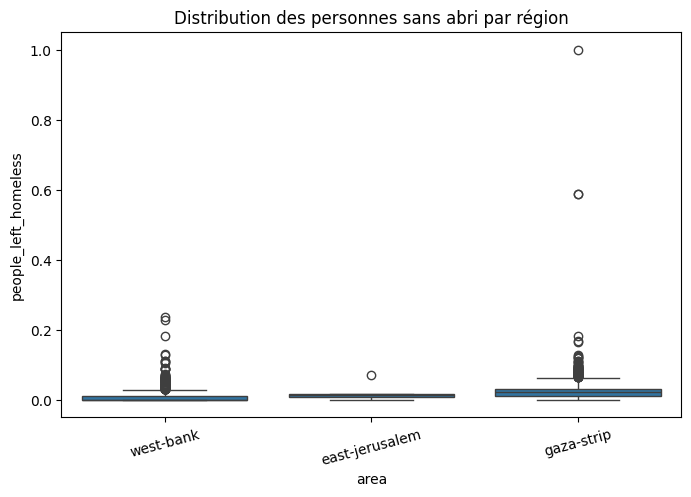

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='area', y='people_left_homeless')
plt.title('Distribution des personnes sans abri par région')
plt.xticks(rotation=15)
plt.show()

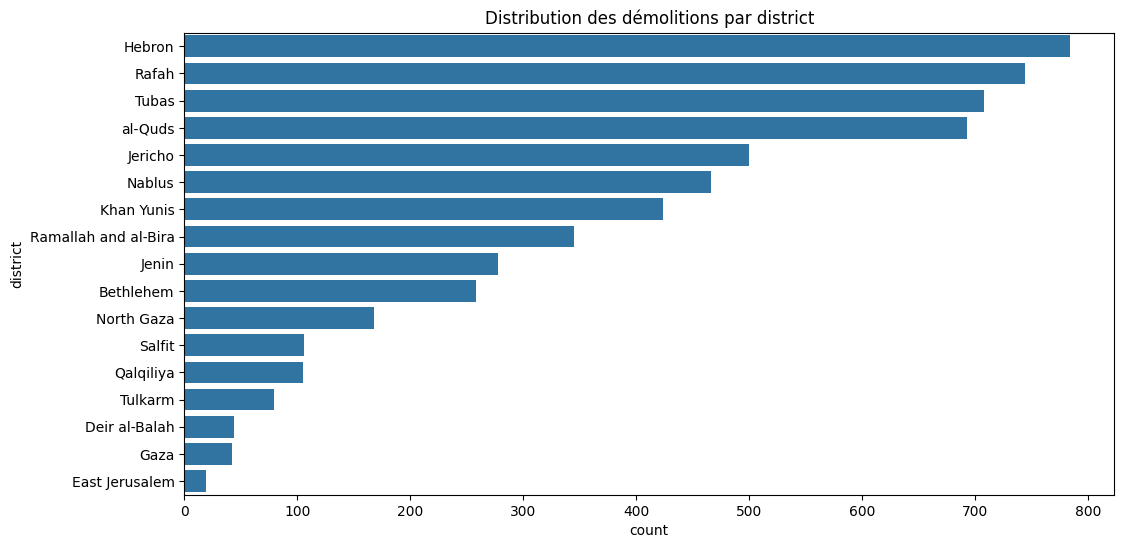

In [9]:
# Distribution des démolitions par district
plt.figure(figsize=(12, 6))
sns.countplot(y='district', data=df, order=df['district'].value_counts().index)
plt.title('Distribution des démolitions par district')
plt.show()


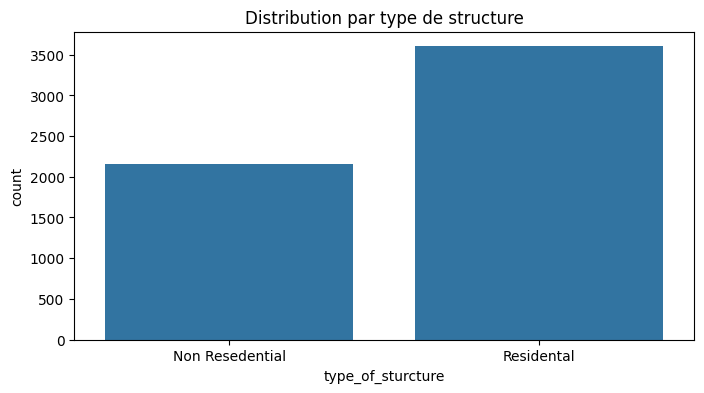

In [10]:

# Distribution par type de structure
plt.figure(figsize=(8, 4))
sns.countplot(x='type_of_sturcture', data=df)
plt.title('Distribution par type de structure')
plt.show()


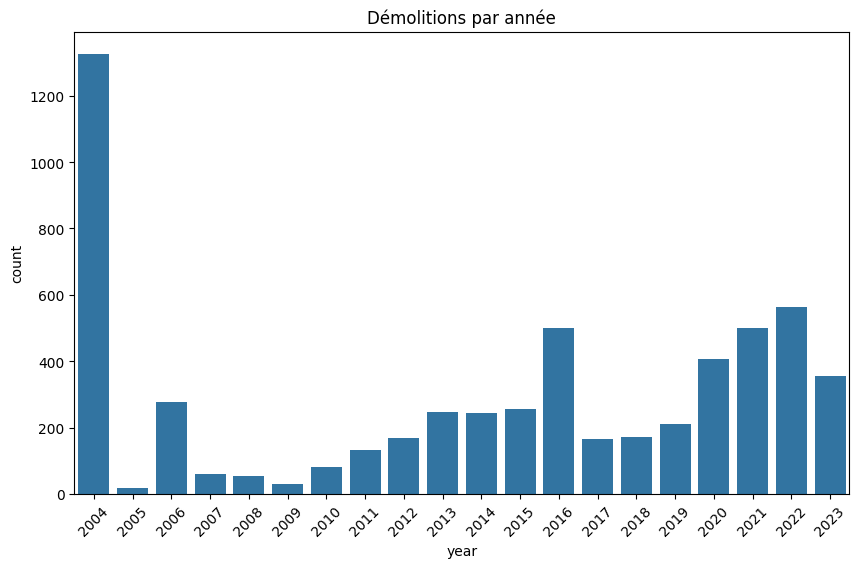

In [11]:

# Analyse temporelle annuelle
plt.figure(figsize=(10, 6))
sns.countplot(x='year', data=df)
plt.title('Démolitions par année')
plt.xticks(rotation=45)
plt.show()


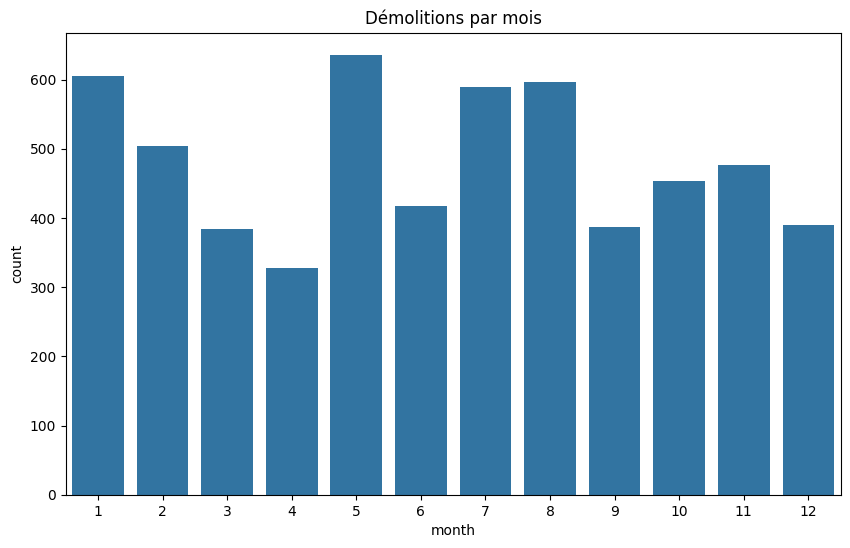

In [12]:

# Analyse temporelle mensuelle (moyenne sur toutes les années)
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=df)
plt.title('Démolitions par mois')
plt.show()



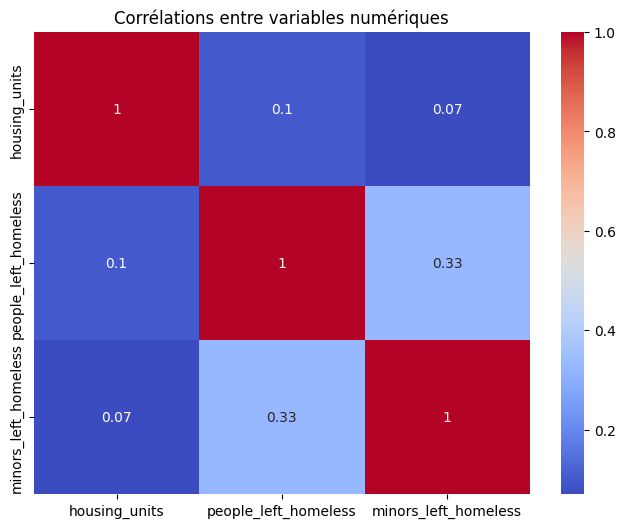

In [13]:
# Visualiser les corrélations entre variables numériques
correlation = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Corrélations entre variables numériques')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split  # Pour diviser les données
from sklearn.linear_model import LogisticRegression  # Modèle de classification
from sklearn.metrics import roc_auc_score, accuracy_score  # Pour évaluer

# Créer la variable binaire 'demolished' (1 si people_left_homeless > 0, sinon 0)
df['demolished'] = (df['people_left_homeless'] > 0).astype(int)

# Séparer X (caractéristiques) et y (cible)
X = df_preprocessed.drop(columns=['date_of_demolition'])  # Utilise les données prétraitées sans date
y = df['demolished']

# Diviser en entraînement (80%) et test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle de classification (Logistic Regression)
model = LogisticRegression(max_iter=1000)  # max_iter pour éviter des erreurs de convergence
model.fit(X_train, y_train)

# Effectuer des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)  # Prédictions binaires (0/1)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilités pour AUC

# Évaluer la performance
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f"AUC (Aire sous la courbe) : {auc}")
print(f"Précision : {accuracy}")

AUC (Aire sous la courbe) : 0.9732447509523208
Précision : 0.9132697311361665
